# Tornado Analysis and Prediction

Imported from [this dataset](https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021), in this project we will look at the history of tornadoes from 1950 and perform some analytical modeling techniques to predict the severity and outcome of a given tornado.

# Part 1: Data Preprocessing and Exploration

In [93]:
# Import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Read in the data and rename some of the columns for readability
df = pd.read_csv("us_tornado_dataset_1950_2021.csv")
df = df.rename(columns={'yr':'year',
                        'mo':'month',
                        'dy':'day',
                        'st':'state',
                        'mag':'magnitude',
                        'inj':'injuries',
                        'fat':'fatalities'})

Let's get a quick look at the data

In [85]:
df.head()

,year,month,day,date,state,magnitude,injuries,fatalities,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [42]:
df.describe()

,year,month,day,magnitude,injuries,fatalities,slat,slon,elat,elon,len,wid
count,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000
mean,1991.341618,5.976761,15.921016,0.691273,1.437876,0.090470,37.142412,-92.784618,22.730695,-56.245590,3.478340,106.577030
std,19.330015,2.438192,8.736773,1.283375,18.263956,1.484106,5.093979,8.689103,18.588638,45.489157,8.278775,205.802676
min,1950.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000
25%,1976.000000,4.000000,8.000000,0.000000,0.000000,0.000000,33.220000,-98.450000,0.000000,-94.709800,0.100000,20.000000
50%,1994.000000,6.000000,16.000000,1.000000,0.000000,0.000000,37.030000,-93.600000,32.480000,-84.420000,0.800000,50.000000
75%,2008.000000,7.000000,24.000000,1.000000,0.000000,0.000000,40.930000,-86.730000,38.610000,0.000000,3.130000,100.000000
max,2021.000000,12.000000,31.000000,5.000000,1740.000000,158.000000,61.020000,-64.715100,61.020000,0.000000,234.700000,4576.000000


In [61]:
df.isna().sum()

year          0
month         0
day           0
date          0
state         0
magnitude     0
injuries      0
fatalities    0
slat          0
slon          0
elat          0
elon          0
len           0
wid           0
dtype: int64

For the next section of exploration we will be looking at the magnitude of the tornadoes. Since the dataset uses the value of -9 to mark unknown magnitudes, we will need to remove those for our purposes.

In [86]:
# Count the number of unknown magnitude readings
df[df['magnitude']==-9]['magnitude'].count()

605

Lets remove those and verify that they are gone

In [87]:
mgdf = df[df['magnitude']!=-9]
mgdf[mgdf['magnitude']==-9]['magnitude'].count()

0

In [73]:
mgdf['magnitude'].value_counts()

0    31375
1    22885
2     9517
3     2536
4      581
5       59
Name: magnitude, dtype: int64

As we can see, the vast majority of tornadoes are either Category 0 or Category 1. According to the dataset author, 2007 was when the data switched from the normal Fujita score to the Enchanced Fujita score. Lets look at any differences between those scores and for speed considerations lets look just at Missouri (which is where I am from). 

In [75]:
mgdf_bef2007 = mgdf[(mgdf['year']<2007) & (mgdf['state']=='MO')]
mgdf_aft2007 = mgdf[(mgdf['year']>=2007) & (mgdf['state']=='MO')]

In [76]:
mgdf_bef2007.head()

,year,month,day,date,state,magnitude,injuries,fatalities,slat,slon,elat,elon,len,wid
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
5,1950,1,25,1950-01-25,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.3,300
132,1950,6,9,1950-06-09,MO,1,0,0,38.00,-92.22,38.02,-92.17,2.7,220
141,1950,6,15,1950-06-15,MO,1,0,0,39.70,-92.07,0.00,0.00,0.2,100
168,1950,7,19,1950-07-19,MO,1,0,0,38.42,-92.77,0.00,0.00,1.5,440


<Axes: xlabel='date', ylabel='magnitude'>

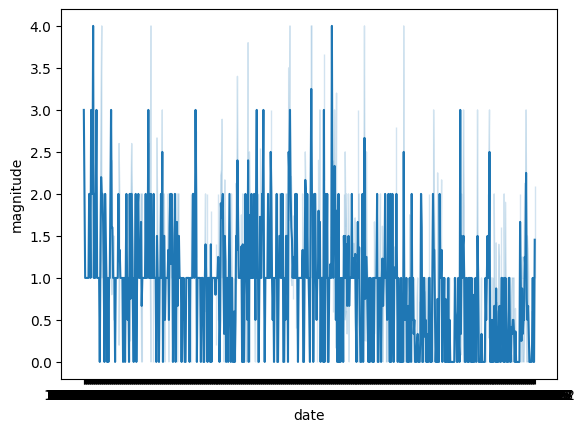

In [77]:
sns.lineplot(x='date',y='magnitude',data=mgdf_bef2007)

<Axes: xlabel='magnitude', ylabel='count'>

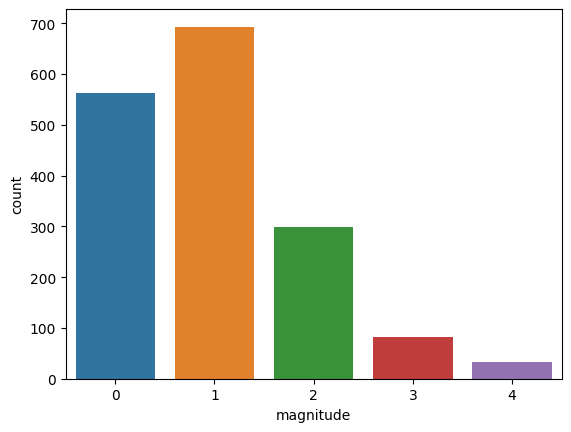

In [78]:
sns.countplot(x='magnitude',data=mgdf_bef2007)

<Axes: xlabel='date', ylabel='magnitude'>

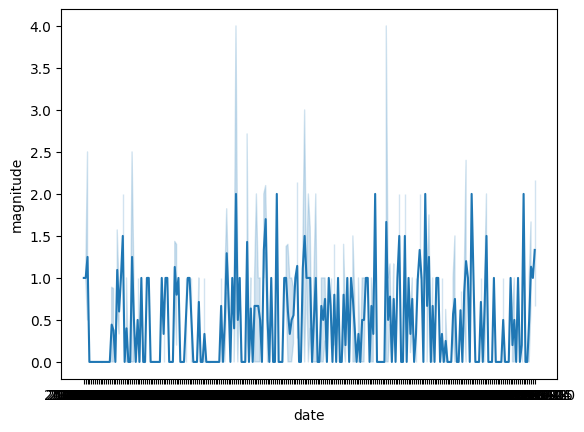

In [79]:
sns.lineplot(x='date',y='magnitude',data=mgdf_aft2007)

<Axes: xlabel='magnitude', ylabel='count'>

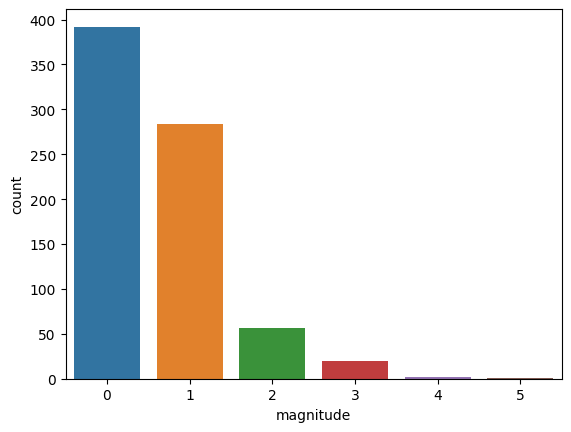

In [80]:
sns.countplot(x='magnitude',data=mgdf_aft2007)

There are not many differences between the two sets, except that there are proportionally more Category 1 tornadoes than Category 0 before 2007. However, because we have restricted the data so heavily, it would not be fair to claim that the frequency of Category 1 tornadoes has gone down over time. The timeslices between 1950-2006 is 56 years and 2007-2021 is only 14 years. In addition there are zero category 5 tornadoes reported before 2007 in Missouri. 

Let's look at another feature, fatalities, before we start modeling.

(0.0, 10.0)

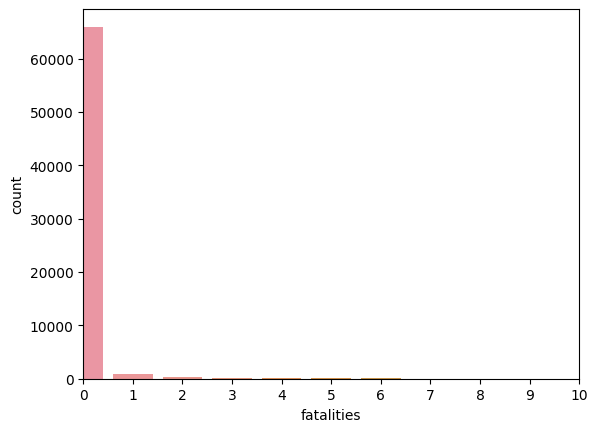

In [88]:
fig = sns.countplot(x='fatalities', data=df)
fig.set_xlim(0,10)

The overwhelming majority of tornadoes do not kill anyone (that's great!) but let's see the breakdown of all tornadoes that did kill someone 

(0.0, 10.0)

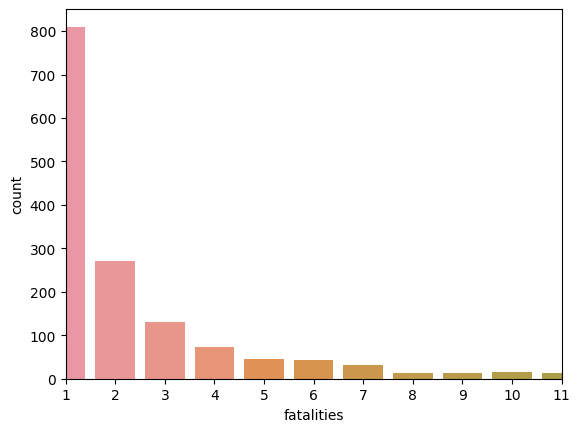

In [89]:
fig = sns.countplot(x='fatalities', data=df[df['fatalities'] != 0])
fig.set_xlim(0,10)

Now lets see tornadoes with mass casualities (ie. >= 10 fatalities)

<ipython-input-94-83dfc7928547>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


<Axes: xlabel='fatalities', ylabel='count'>

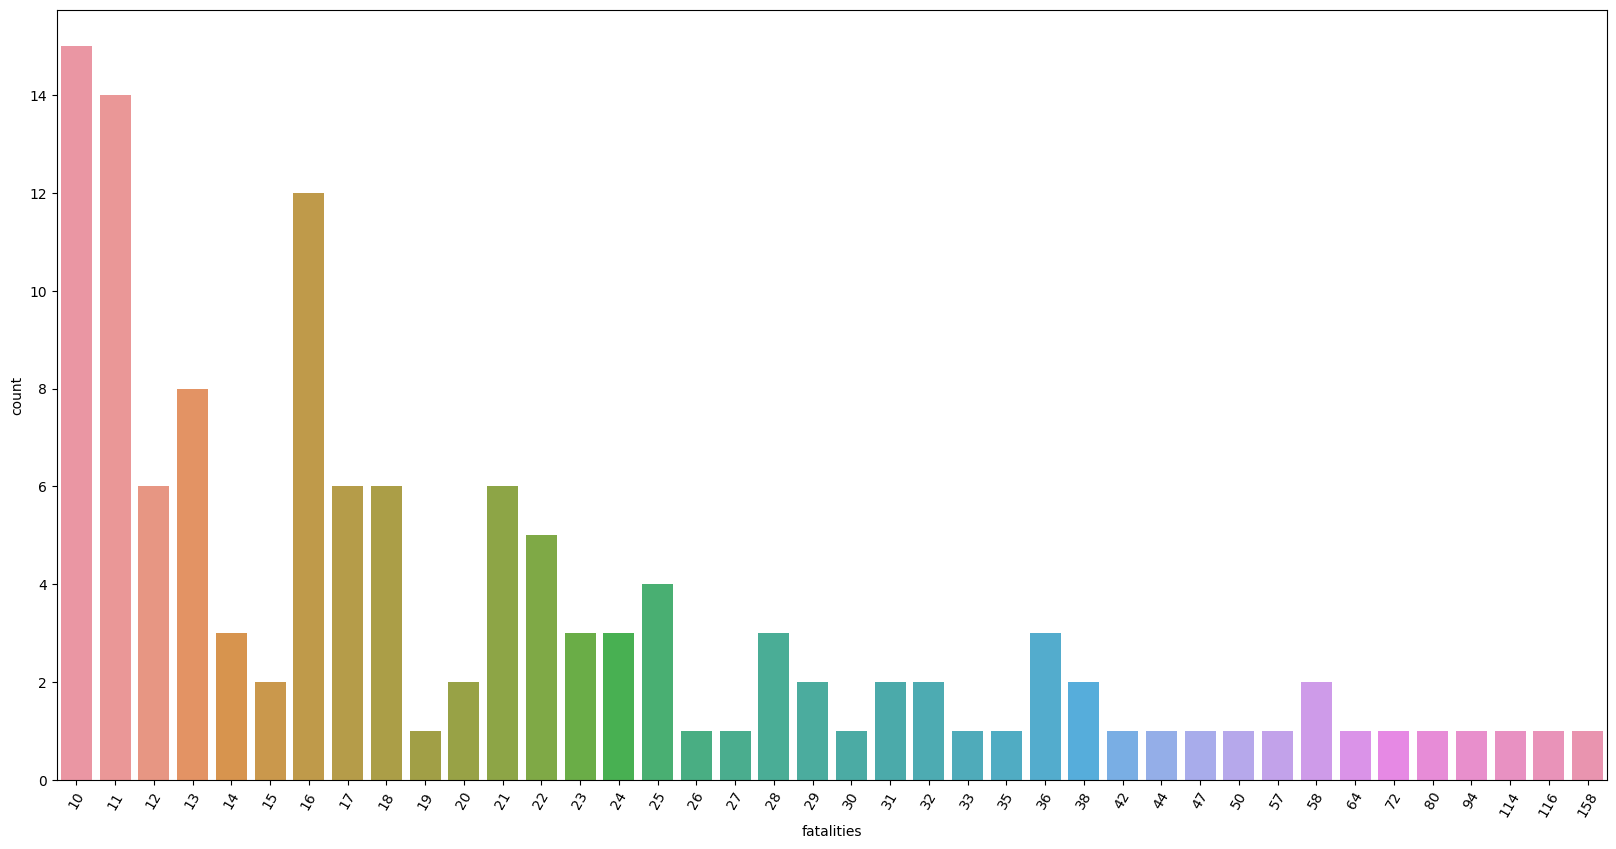

In [94]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.countplot(x='fatalities', data=df[df['fatalities'] >= 10], ax=ax)

In [72]:
mgdf['fatalities'].value_counts()

0      65394
1        810
2        270
3        131
4         73
5         45
6         43
7         31
10        15
9         14
11        14
8         13
16        12
13         8
12         6
21         6
18         6
17         6
22         5
25         4
14         3
24         3
36         3
28         3
23         3
38         2
32         2
31         2
58         2
15         2
29         2
20         2
47         1
19         1
158        1
72         1
64         1
27         1
30         1
42         1
114        1
26         1
44         1
50         1
35         1
116        1
33         1
94         1
80         1
57         1
Name: fatalities, dtype: int64

Now that there is a wide range to the possible death toll of a tornado lets compare the two features we looked at and see if there might be a corralation between the two. 

<Axes: xlabel='magnitude', ylabel='fatalities'>

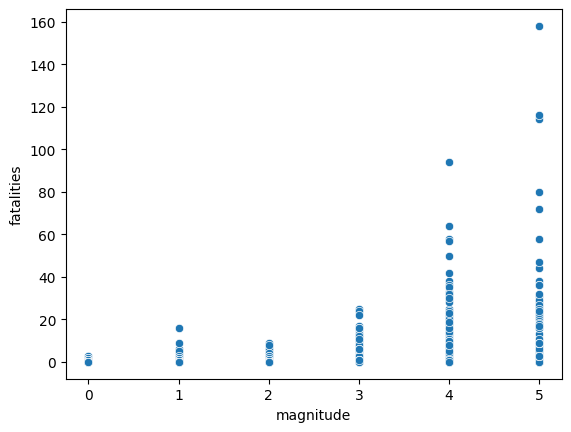

In [95]:
sns.scatterplot(data=mgdf, y='fatalities', x='magnitude')

There definitely appears to be a correlation between the two features. This is a good sign since it matches our understanding of the problem, more dangerous tornado should result in more fatalities. 

# Part 2: Building a Model to Predict Fatalities

For our model, the purpose will be to predict the number of fatalities given the features of the tornado from this dataset. While it would be fair to assume a higher level of importance to the Magnitude feature as we have demonstrated correlation in the previous part, we should be thorough and check how each feature affects the model. We will start with a simple Linear Regression model as our output is not limited to 0-1.  

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We will remove the end position features (elon and elat) because if our model were to be used by meteorologists, they would not be able to know where the tornado will end its path. We will remove the 'date' feature as well, since it is already represented by 'year', 'month', and 'day'. We will also remove rows with an unknown magnitude score and convert the categorical feature 'state' into a numerical one.

In [138]:
data = df[df['magnitude'] != -9].drop(['elon','elat','date'], axis=1)
data = pd.get_dummies(data)
print(len(data.columns))
print(data.columns)

63
Index(['year', 'month', 'day', 'magnitude', 'injuries', 'fatalities', 'slat',
       'slon', 'len', 'wid', 'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_PR',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VI', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY'],
      dtype='object')


In [139]:
X = data.drop('fatalities',axis=1)
y = data['fatalities']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=69)

In [140]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [141]:
mean_squared_error(y_test, y_pred)

0.6952414691264956

In [142]:
col = X.columns
features = sorted(list(enumerate(model.coef_)), key=lambda x:x[1], reverse=True)
for i,v in features:
 print('Feature: %s, Score: %.5f' % (col[i],v))

Feature: state_VI, Score: 0.16514
Feature: state_PR, Score: 0.14974
Feature: state_MA, Score: 0.14297
Feature: state_NY, Score: 0.10638
Feature: state_ME, Score: 0.10456
Feature: state_VT, Score: 0.09035
Feature: state_NH, Score: 0.08955
Feature: state_TN, Score: 0.08239
Feature: state_DC, Score: 0.07735
Feature: state_MI, Score: 0.07534
Feature: state_NC, Score: 0.07379
Feature: state_FL, Score: 0.06972
Feature: state_NJ, Score: 0.06720
Feature: injuries, Score: 0.06445
Feature: state_DE, Score: 0.05720
Feature: state_PA, Score: 0.05671
Feature: state_MO, Score: 0.05446
Feature: state_AL, Score: 0.04127
Feature: state_MD, Score: 0.04094
Feature: state_VA, Score: 0.04087
Feature: state_WV, Score: 0.03623
Feature: state_MS, Score: 0.03355
Feature: state_AR, Score: 0.03155
Feature: state_SC, Score: 0.02754
Feature: state_KY, Score: 0.02634
Feature: state_WI, Score: 0.02257
Feature: state_GA, Score: 0.01716
Feature: state_IN, Score: 0.00605
Feature: len, Score: 0.00448
Feature: magnitude,

It seems like more importance was put onto the states than I had hoped. Resulting a large error. For the sake of our sanity lets remove the state feature for now and try again.

In [143]:
no_state_data = df[df['magnitude'] != -9].drop(['elon','elat','date','state'], axis=1)
X = no_state_data.drop('fatalities',axis=1)
y = no_state_data['fatalities']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=69)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.6946337928629758

Not a huge change but it in fact improved very slightly. Lets look at the features again.

In [144]:
col = X.columns
features = sorted(list(enumerate(model.coef_)), key=lambda x:x[1], reverse=True)
for i,v in features:
 print('Feature: %s, Score: %.5f' % (col[i],v))

Feature: injuries, Score: 0.06444
Feature: len, Score: 0.00453
Feature: magnitude, Score: 0.00109
Feature: day, Score: 0.00067
Feature: wid, Score: 0.00020
Feature: year, Score: -0.00013
Feature: month, Score: -0.00088
Feature: slat, Score: -0.00089
Feature: slon, Score: -0.00105


This makes a lot of sense from our real-world understanding of the problem. If a bunch of people are getting injured, then it would be more likely that people would die. Also, our feature we thought would perform the best 'Magnitude' came in at 3rd. This makes sense since a higher level tornado will more likely be taken seriously by the local population and government.

Now let's train the model using only the best 4 parameters.

In [148]:
best_data = df[df['magnitude'] != -9].drop(['elon','elat','date','state','slat','slon','month','year','wid'], axis=1)
X = best_data.drop('fatalities',axis=1)
y = best_data['fatalities']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=69)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.692702452007745

In [149]:
col = X.columns
features = sorted(list(enumerate(model.coef_)), key=lambda x:x[1], reverse=True)
for i,v in features:
 print('Feature: %s, Score: %.5f' % (col[i],v))

Feature: injuries, Score: 0.06454
Feature: magnitude, Score: 0.01504
Feature: len, Score: 0.00560
Feature: day, Score: 0.00078


Even with all of our feature manipulation we could not meaningfully improve the loss. I think to better improve our results, we should change the problem we are trying to solve. For the next section we will try to predict if a given tornado will have any fatalities at all.

# Part 3: Solving the Classification Problem

For this part, we will engineer a new output feature to change the problem into a binary classification problem. Our new question we will ask will be "Will this tornado have ANY fatalities?"

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [160]:
# We will need to create a new feature for our data to be our classification output
bin_data = df[df['magnitude'] != -9].drop(['elon','elat','date','state'], axis=1)
bin_data['hasFatalities'] = bin_data['fatalities'] >= 1
bin_data['hasFatalities'] = bin_data['hasFatalities'].astype(int)
bin_data = bin_data.drop('fatalities',axis=1)
bin_data.head()

,year,month,day,magnitude,injuries,slat,slon,len,wid,hasFatalities
0,1950,1,3,3,3,39.10,-89.30,3.6,130,0
1,1950,1,3,3,3,38.77,-90.22,9.5,150,0
2,1950,1,3,1,1,40.88,-84.58,0.1,10,0
3,1950,1,13,3,1,34.40,-94.37,0.6,17,1
4,1950,1,25,2,0,41.17,-87.33,0.1,100,0


In [162]:
X = bin_data.drop('hasFatalities',axis=1)
y = bin_data['hasFatalities']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=69)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9827946711273075

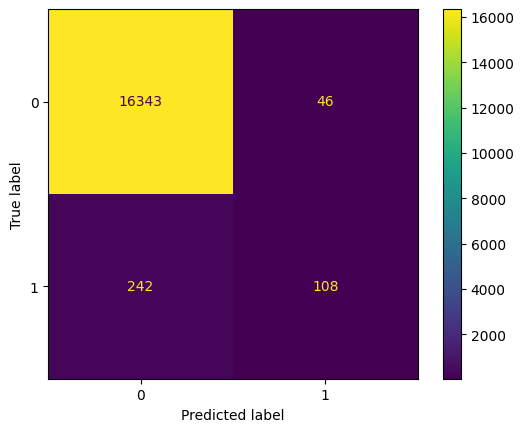

In [167]:
l = model.classes_
cm = confusion_matrix(y_test,y_pred, labels=l)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=l)
disp.plot()
plt.show()

While our accuracy is amazing (98%!), we should probably investigate if the model is just guessing 0 because the imbalance of samples. Well over 90% of our samples have 0 fatalities. Lets take a look

<Axes: xlabel='hasFatalities', ylabel='count'>

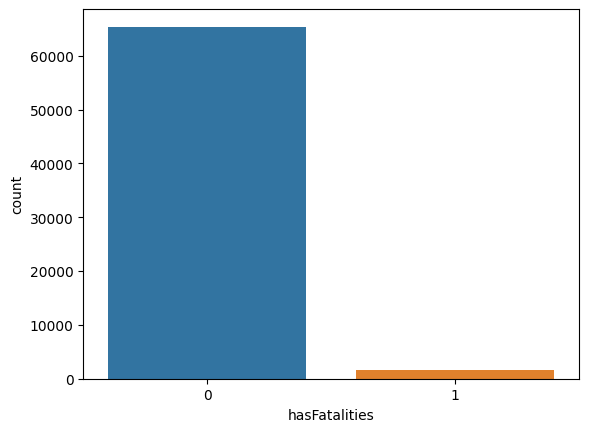

In [169]:
sns.countplot(data=bin_data, x='hasFatalities')

In [171]:
no_fatalities = bin_data[bin_data['hasFatalities'] == 0]
has_fatalities = bin_data[bin_data['hasFatalities'] != 0]
print('# without fatalities:', len(no_fatalities))
print('# without fatalities:', len(has_fatalities))

# without fatalities: 65394
# without fatalities: 1559


In [172]:
no_fatalities = no_fatalities.sample(len(has_fatalities))
print('# without fatalities:', len(no_fatalities))
print('# without fatalities:', len(has_fatalities))

# without fatalities: 1559
# without fatalities: 1559


<Axes: xlabel='hasFatalities', ylabel='count'>

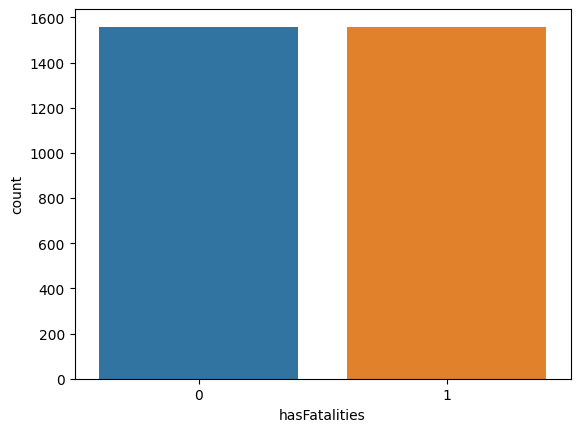

In [179]:
evened_data = pd.concat([no_fatalities, has_fatalities], ignore_index=True)
sns.countplot(data=evened_data, x='hasFatalities')

87.6923076923077


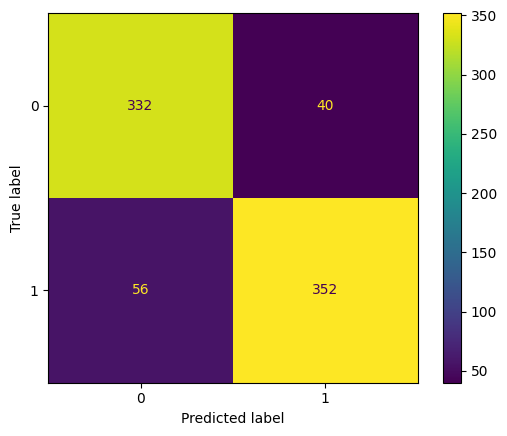

In [178]:
X = evened_data.drop('hasFatalities',axis=1)
y = evened_data['hasFatalities']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=69)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)
l = model.classes_
cm = confusion_matrix(y_test,y_pred, labels=l)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=l)
disp.plot()
plt.show()

Now that's a model we can be proud of! 87.7% accuracy after evening the data does show that our initial model was heavily biased by our input data. Lets see which features were most important!

In [185]:
col = X.columns
features = sorted(list(enumerate(model.coef_[0])), key=lambda x:x[1], reverse=True)
for i,v in features:
 print('Feature: %s, Score: %.5f' % (col[i],v))

Feature: magnitude, Score: 1.26949
Feature: injuries, Score: 0.16346
Feature: slon, Score: 0.03108
Feature: len, Score: 0.01895
Feature: day, Score: 0.00720
Feature: year, Score: 0.00083
Feature: wid, Score: -0.00009
Feature: month, Score: -0.02120
Feature: slat, Score: -0.04652


Wow! Our original guess of 'Magnitude' being the most important was correct in this case. Lets trim the less useful features and see if we can improve the scores.

87.82051282051282


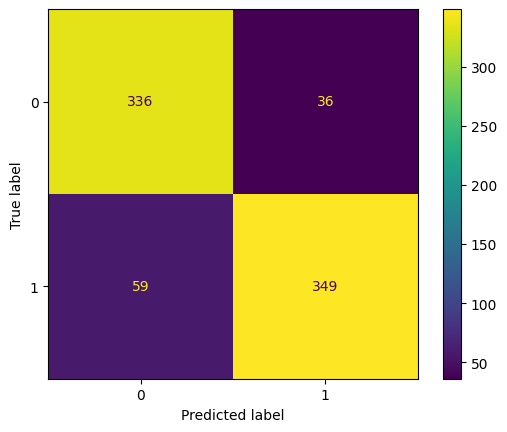

In [187]:
X = evened_data.drop(['hasFatalities','slat','month','wid'],axis=1)
y = evened_data['hasFatalities']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=69)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)
l = model.classes_
cm = confusion_matrix(y_test,y_pred, labels=l)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=l)
disp.plot()
plt.show()

Not a meaningful increase in accuracy but the calculates will be much easier to perform because our model is so lean.

# Conclusion

In this project we explored our preprocessed data to find some meaningful connections to the number of fatalities. We made a guess that the magnitude of the tornado would have the strongest correlation to the number of fatalities, and when we created our linear regression model we found that not to be the case. For that problem the best performing feature was injuries, which makes sense given our real-world understanding of the problem. The amount of loss was quite large and feature selection proved to not meaningfully improve our metric. We decided to change the problem we were solving, and instead attempt to predict if a given tornado would have any fatalities, as opposed to trying to guess the number. By doing this, we created a binary classification problem and could fit a Logistic Regression model to this data. After our model scored a suprising 98%, we realized that model is probably biased to just guessing No. After reexamining our data, we equalized the samples that the model would be trained on, and still managed to score almost 88% on our accuracy. 